In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

In [32]:
def twoDGaussianPlot (nx, ny, m, C):

    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = np.exp(-0.5 * np.dot((xvec-m).T, np.dot(Ci, (xvec-m))))     
            den = 2 * np.pi * dC     
            Z[i,j] = (num / den)

    return X, Y, Z

In [33]:
nx, ny = 50, 40

m1 = np.array([0, 0])
C1 = np.array([[2, 1], [1,2]], np.float32)
X, Y, Z1 = twoDGaussianPlot(nx, ny, m1, C1)

C2 = np.array([[2, -1], [-1,2]], np.float32)
X, Y, Z2 = twoDGaussianPlot(nx, ny, m1, C2)

C3 = np.array([[2, 0], [0 ,2]], np.float32)
X, Y, Z3 = twoDGaussianPlot(nx, ny, m1, C3)

Text(0.5,1,'2D Gaussian: Isotropic')

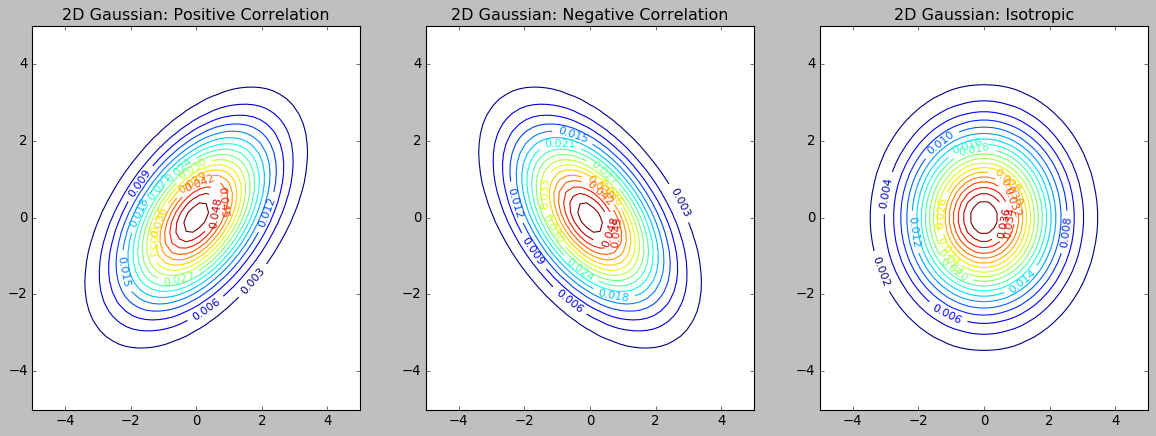

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

CS = ax[0].contour(X, Y, Z1,20)
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title('2D Gaussian: Positive Correlation')

CS = ax[1].contour(X, Y, Z2, 20)
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('2D Gaussian: Negative Correlation')

CS = ax[2].contour(X, Y, Z3, 20)
ax[2].clabel(CS, inline=1, fontsize=10)
ax[2].set_title('2D Gaussian: Isotropic')